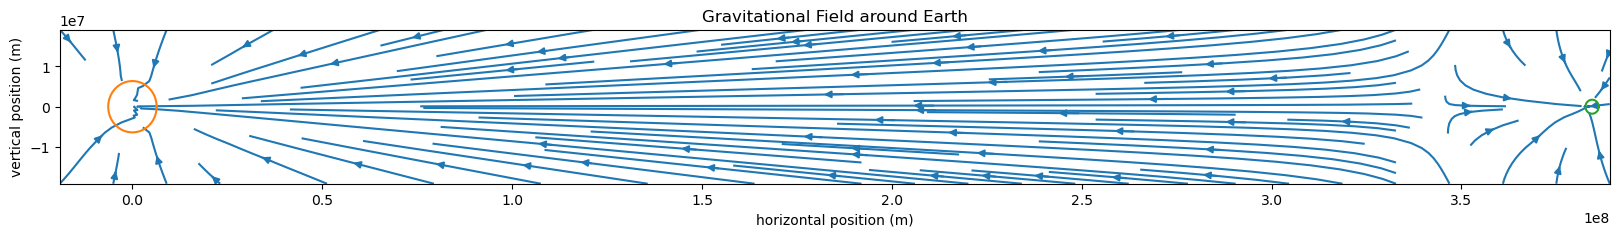

In [15]:
# We will consider just the space around the Earth and only gravitational effects of the Earth

import numpy as np
import matplotlib.pyplot as plt

# Given values 
r_earth = 6378.1e3 #m, Radius of Earth 
e_pos = np.array([0,0]) #m, Coordinate location of Earth at origin 
m_earth = 5.97219e24 #kg, Mass of Earth 
r_moon = 1740e3 #m, Radius of the moon 
m_moon = 7.35e22 #kg, Mass of the moon 
m_pos = np.array([3.844e8, 0]) #m, Coordinate location of Moon at origin 
G = 6.67e-11 #m^3/(kg*s), Newton's Law of Universal Gravitation 

# Creating a grid 
x=np.linspace(-3*r_earth,61*r_earth,41) #m, Coordinate grid 4 Earth radi wide, with 20 spaces 
y=np.linspace(-3*r_earth,3*r_earth,21) #m, Coordinate grid 4 Earth radi long, with 20 spaces 

X,Y = np.meshgrid(x,y) # Creates our coordinate grid

# Fills up matrix with zero values - and shape of the grid previously determined with np.linspace function 
# We can overwrite later since they are all uniform 
g_ex = np.zeros(X.shape) 
g_ey = np.zeros(Y.shape) 
g_mx = np.zeros(X.shape) 
g_my = np.zeros(Y.shape) 

# Define function 
def Gfield(m,rplanet,ppos,xpos,ypos): # Function requiring - m (mass of Earth), radius of Earth, position of Earth, and coordinate location 

    # Find the 'r' vector and other information. ppos is the position of the Earth 
    rx = xpos - ppos[0] # Horizontal distance between the grid point and the Earth (x direction) 
    ry = ypos - ppos[1] # Vertical distance between grid point and Earth (y) 
    r = np.array([rx, ry]) # Component form of vector r 
    rmag = np.linalg.norm(r) # Magnitude of r vector 

    # If the coordinates are inside the Earth, we define the strength of the field as zero for simplicity 
    if rmag < rplanet: 
        return (0,0) # Returning gravitational field of 0 inside the Earth 
    
    else:
        rhat = r / rmag # Defining unit vector rhat 
        gmag = - G * m / rmag**2 #m/s/s, Magnitude of the gravitational field - negative sign reverses direction of r vector 
        # Since the quiver function works on a component - not vector - basis, we split apart x and y of gravitational field values  
        gx = gmag * rhat[0] # Horizontal magnitude and direction of gravitational field. Can also use gmag * (rx / rmag) or gmag 
        gy = gmag * rhat[1] # Vertical magnitude and direction of gravitational field 
        return (gx, gy) # Returning components of the vector (almost like parametrics) 

# This chunk of code runs the function over every point in our defined space, defining u and v in the process
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        g_ex[i,j],g_ey[i,j] = Gfield(m_earth,r_earth,e_pos,X[i,j],Y[i,j]) # Earth gfield 
        g_mx[i,j],g_my[i,j] = Gfield(m_moon,r_moon,m_pos,X[i,j],Y[i,j]) # Moon gfield 

u = g_ex + g_mx #m/s/s, x component of Earth gfield + x component of moon gfield 
v = g_ey + g_my #m/s/s, y component of Earth gfield + y component of moon gfield 

# Plot stuff        
plt.figure(figsize=(20,2))
plt.streamplot(X,Y,u,v)
plt.plot(r_earth*np.cos(np.linspace(0,np.pi*2,361)),r_earth*np.sin(np.linspace(0,np.pi*2,361)))
plt.plot(r_moon*np.cos(np.linspace(0,np.pi*2,361)) + m_pos[0],r_moon*np.sin(np.linspace(0,np.pi*2,361)))
plt.title('Gravitational Field around Earth')
plt.xlabel('horizontal position (m)')
plt.ylabel('vertical position (m)')
plt.show()